# Tarea 2

Daniela Paz Díaz Mora

201710003-6

In [1]:
import numpy as np

from sympy import Matrix
from sympy.abc import x, y
from numpy import linalg

### Problema 1
# 2.4 Lutkepohl

#### Determine the autocovariances $\Gamma_y(0)$, $\Gamma_y(1)$, $\Gamma_y(2)$, $\Gamma_y(3)$ of the process (2.4.1). Compute an plot the autocorrelations $R_y(0)$,$R_y(1)$,$R_y(2)$,$R_y(3)$.

Para calcular $\Gamma_y(0)$ se tiene que $Vec(\Gamma(0))=(I_{k^2}-A_1\otimes A_1)^{-1}Vec(\Sigma_u)$

In [2]:
#vectorización de una matriz de mxn
def Vec(M):
    aux=[]
    (a,b)=M.shape
    for i in np.arange(b):
        for j in np.arange(a):
            aux.append(M[j,i])
    return np.array(aux).T

In [3]:
Sigma_u=np.array([[0.26,0.03,0],[0.03,0.09,0],[0,0,0.81]])
vec_sigma=Vec(Sigma_u)
A1=np.array([[0.7,0.1,0],[0,0.4,0.1],[0.9,0,0.8]])
vec_gamma_0=np.dot(np.linalg.inv(np.eye(9)-np.kron(A1,A1)),vec_sigma)
#desvectorizacion
Gamma_0=vec_gamma_0.reshape(3,3).T

In [4]:
Matrix(Gamma_0)

Matrix([
[0.564403943690934, 0.176906937783372, 1.05195079079148],
[0.176906937783372, 0.307903999270431, 1.14202798778072],
[ 1.05195079079148,  1.14202798778072, 7.72771203647051]])

Luego $\Gamma(h)=A_1\Gamma_y(h-1)$

In [5]:
Gamma_1=np.dot(A1,Gamma_0)
Matrix(Gamma_1)

Matrix([
[0.412773454361991, 0.154625256375403, 0.850568352332105],
[0.175957854192496, 0.237364398486244,  1.22958239875934],
[ 1.34952418195502,  1.07283863422961,  7.12892534088874]])

In [6]:
Gamma_2=np.dot(A1,Gamma_1)
Matrix(Gamma_2)

Matrix([
[0.306537203472643, 0.131974119311407, 0.718356086508407],
[0.205335559872501, 0.202229622817459,  1.20472549359261],
[ 1.45111545448981,  0.99743363812155,  6.46865178980988]])

In [7]:
Gamma_3=np.dot(A1,Gamma_2)
Matrix(Gamma_3)

Matrix([
[  0.2351095984181, 0.112604845799731, 0.623321809915146],
[0.227245769397981, 0.180635212939138,  1.12875537641803],
[ 1.43677584671723, 0.916723617877506,  5.82144190970547]])

Se tine que para calcular las autocorrelaciones se hace mediante

$R_y(h)=D^{-1}\Gamma_y(h) D^{-1}$

In [8]:
D_inv=np.diag(1/np.sqrt(np.diag(Gamma_0)))
R0=np.dot(np.dot(D_inv,Gamma_0),D_inv)
Matrix(R0)

Matrix([
[              1.0, 0.424367562556585, 0.503703466234757],
[0.424367562556585,               1.0, 0.740361143062004],
[0.503703466234757, 0.740361143062004,               1.0]])

In [9]:
R1=np.dot(np.dot(D_inv,Gamma_1),D_inv)
Matrix(R1)

Matrix([
[0.731344029353602,  0.37091786212516, 0.407275921164448],
[ 0.42209088367011, 0.770903915014652, 0.797121471605457],
[0.646189930335929, 0.695506630360993, 0.922514362238677]])

In [10]:
R2=np.dot(np.dot(D_inv,Gamma_2),D_inv)
Matrix(R2)

Matrix([
[ 0.54311669310465, 0.316581904782695, 0.343968989740363],
[0.492562655490582, 0.656794401166062,  0.78100707955979],
[0.694834673571943,  0.64662260150314, 0.837072054352108]])

In [11]:
R3=np.dot(np.dot(D_inv,Gamma_3),D_inv)
Matrix(R3)

Matrix([
[0.416562642848658,  0.27011854109762, 0.298463919588629],
[0.545121262450462,  0.58666082079852, 0.731756690434717],
[0.687968468229711, 0.594299397970662, 0.753320243072141]])

In [12]:
import matplotlib.pyplot as plt

In [13]:
R0

array([[1.        , 0.42436756, 0.50370347],
       [0.42436756, 1.        , 0.74036114],
       [0.50370347, 0.74036114, 1.        ]])

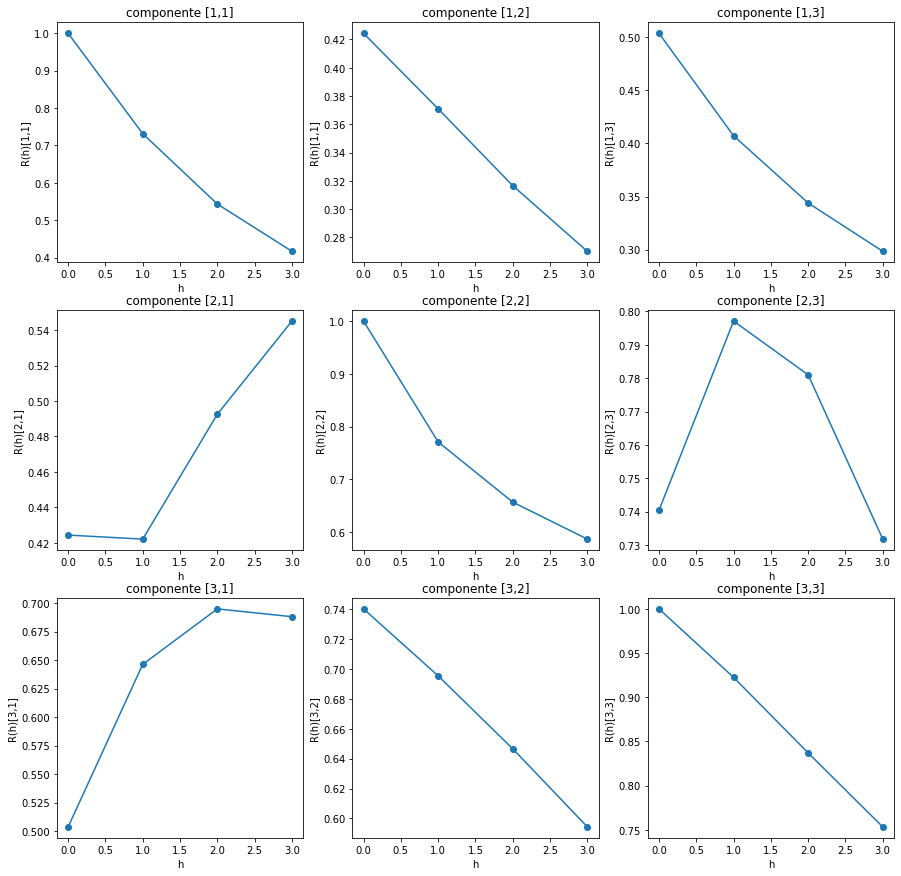

In [14]:
fig, axs = plt.subplots(3, 3,figsize=(15,15))
x=[0,1,2,3]
axs[0,0].plot(x,[R0[0,0],R1[0,0],R2[0,0],R3[0,0]],marker='o')
axs[0,0].set_title('componente [1,1]')
axs[0,0].set_xlabel('h')
axs[0,0].set_ylabel('R(h)[1,1]')
axs[0,1].plot(x,[R0[0,1],R1[0,1],R2[0,1],R3[0,1]],marker='o')
axs[0,1].set_title('componente [1,2]')
axs[0,1].set_xlabel('h')
axs[0,1].set_ylabel('R(h)[1,1]')
axs[0,2].plot(x,[R0[0,2],R1[0,2],R2[0,2],R3[0,2]],marker='o')
axs[0,2].set_title('componente [1,3]')
axs[0,2].set_xlabel('h')
axs[0,2].set_ylabel('R(h)[1,3]')
axs[1,0].plot(x,[R0[1,0],R1[1,0],R2[1,0],R3[1,0]],marker='o')
axs[1,0].set_title('componente [2,1]')
axs[1,0].set_xlabel('h')
axs[1,0].set_ylabel('R(h)[2,1]')
axs[1,1].plot(x,[R0[1,1],R1[1,1],R2[1,1],R3[1,1]],marker='o')
axs[1,1].set_title('componente [2,2]')
axs[1,1].set_xlabel('h')
axs[1,1].set_ylabel('R(h)[2,2]')
axs[1,2].plot(x,[R0[1,2],R1[1,2],R2[1,2],R3[1,2]],marker='o')
axs[1,2].set_title('componente [2,3]')
axs[1,2].set_xlabel('h')
axs[1,2].set_ylabel('R(h)[2,3]')
axs[2,0].plot(x,[R0[2,0],R1[2,0],R2[2,0],R3[2,0]],marker='o')
axs[2,0].set_title('componente [3,1]')
axs[2,0].set_xlabel('h')
axs[2,0].set_ylabel('R(h)[3,1]')
axs[2,1].plot(x,[R0[2,1],R1[2,1],R2[2,1],R3[2,1]],marker='o')
axs[2,1].set_title('componente [3,2]')
axs[2,1].set_xlabel('h')
axs[2,1].set_ylabel('R(h)[3,2]')
axs[2,2].plot(x,[R0[2,2],R1[2,2],R2[2,2],R3[2,2]],marker='o')
axs[2,2].set_title('componente [3,3]')
axs[2,2].set_xlabel('h')
axs[2,2].set_ylabel('R(h)[3,3]')
plt.show()

### Problema 2
# Problema 2.5 Lutkepohl

### Consider again the process  (2.4.1)

### a)  Suppose that $y_{2000}=[0.7 \quad 1\quad 1.5]^T$ y $Y_{1999}=[1\quad 1.5\quad 3]^T$ and forecast $y_{2001}$,$y_{2002}$,$y_{2003}$


In [15]:
from rpy2.robjects import r

In [16]:
r('library(MASS)')
r('MASS::mvrnorm(n=5, mu = c(0,0,0), Sigma = diag(3))')

1.148095,-0.991160,-0.040938,...,0.645486,0.735373,-0.524594


In [17]:
#Creo el vector de errores de distibucion N(0,sigma)
def U(s1,s2,s3):
    u1=np.random.normal(0,np.sqrt(s1))
    u2=np.random.normal(0,np.sqrt(s2))
    u3=np.random.normal(0,np.sqrt(s3))
    return np.array([u1,u2,u2,0,0,0,]).T

In [18]:
A=[[]]
Y_t=np.array([0.7, 1,1.5,1,1.5,3]).T

In [19]:
def Y_th(A,Y,h):
    sum=0
    for i in np.arange(h):
        if i==0:
            sum+= np.dot(np.eye(6),U(Sigma_u[0,0],Sigma_u[1,1],Sigma_u[2,2]))
        else:
            sum+=  np.dot(np.linalg.matrix_power(A, i),U(Sigma_u[0,0],Sigma_u[1,1],Sigma_u[2,2]))
    return sum+np.dot(np.linalg.matrix_power(A, h),Y)

In [20]:
y1999=np.array([1,1.5,3]).T
y2000=np.array([0.7,1,1.5]).T
A=np.array([[0.7,.1,0,-0.2,0,0],[0,.4,.1,0,.1,.1],[.9,0,.8,0,0,0],[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0]])
V=np.array([2,1,0,0,0,0]).T
A2=np.array([[-.2,0,0],[0,0.1,0.1],[0,0,0]])

In [21]:
Matrix(A2)

Matrix([
[-0.2, 0.0, 0.0],
[ 0.0, 0.1, 0.1],
[ 0.0, 0.0, 0.0]])

In [22]:
Mu = np.dot(np.linalg.inv(np.eye(6)-A),V)
J = np.block([np.eye(3),np.zeros((3,3))])
v_medias= np.dot(J,Mu)
v_medias

array([ 6.875 , 14.375 , 30.9375])

In [23]:
z1999 = y1999-v_medias
z2000 = y2000-v_medias
z2001 = np.dot(A1,z2000)+np.dot(A2,z1999)
z2002 = np.dot(A1,z2001)+np.dot(A2,z2000)
z2003 = np.dot(A1,z2002)+np.dot(A2,z2001)
y2001 = z2001 + v_medias
y2002 = z2002 + v_medias
y2003 = z2003 + v_medias

In [24]:
Matrix(y2001)

Matrix([
[2.39],
[ 2.0],
[1.83]])

In [25]:
Matrix(y2002)

Matrix([
[3.733],
[2.233],
[3.615]])

In [26]:
Matrix(y2003)

Matrix([
[4.3584],
[2.6377],
[6.2517]])

### (b) Determine the MSE matrices for forecast horizons h = 1, 2, 3.

In [27]:
def phi_i(i):
    return np.dot(np.dot(J,np.linalg.matrix_power(A,i)),J.T)

In [28]:
MSE_1=np.dot(np.dot(phi_i(0),Sigma_u),phi_i(0).T)
Matrix(MSE_1)

Matrix([
[0.26, 0.03,  0.0],
[0.03, 0.09,  0.0],
[ 0.0,  0.0, 0.81]])

In [29]:
MSE_2=MSE_1+np.dot(np.dot(phi_i(1),Sigma_u),phi_i(1).T)
Matrix(MSE_2)

Matrix([
[0.3925,  0.042, 0.1665],
[ 0.042, 0.1125, 0.0756],
[0.1665, 0.0756,  1.539]])

In [30]:
MSE_3=MSE_2+np.dot(np.dot(phi_i(2),Sigma_u),phi_i(2).T)
Matrix(MSE_3)

Matrix([
[ 0.41745, 0.055701, 0.279603],
[0.055701, 0.161298, 0.234117],
[0.279603, 0.234117, 2.352645]])

###  c) Assume that y t is a Gaussian process and construct 90% and 95% forecast intervals for t = 2001, 2002, 2003.

In [31]:
import scipy.stats 

In [45]:
#90%
aux_y=[y2001,y2002,y2003]
aux_mse=[MSE_1,MSE_2,MSE_3]
zaph=scipy.stats.norm.ppf(1-0.9/2)
for i in np.arange(3):
    for j in np.arange(3):
        lim_inf=round(aux_y[i][j]-zaph*np.sqrt(aux_mse[i][j,j]),4)
        lim_sup=round(aux_y[i][j]+zaph*np.sqrt(aux_mse[i][j,j]),4)
        print('El intervalo de confianza del 90% para y',2001+i,'_',i+1,'es de (',lim_inf,',',lim_sup,')')

El intervalo de confianza del 90% para y 2001 _ 1 es de ( 2.3259 , 2.4541 )
El intervalo de confianza del 90% para y 2001 _ 1 es de ( 1.9623 , 2.0377 )
El intervalo de confianza del 90% para y 2001 _ 1 es de ( 1.7169 , 1.9431 )
El intervalo de confianza del 90% para y 2002 _ 2 es de ( 3.6543 , 3.8117 )
El intervalo de confianza del 90% para y 2002 _ 2 es de ( 2.1909 , 2.2751 )
El intervalo de confianza del 90% para y 2002 _ 2 es de ( 3.4591 , 3.7709 )
El intervalo de confianza del 90% para y 2003 _ 3 es de ( 4.2772 , 4.4396 )
El intervalo de confianza del 90% para y 2003 _ 3 es de ( 2.5872 , 2.6882 )
El intervalo de confianza del 90% para y 2003 _ 3 es de ( 6.059 , 6.4444 )


In [47]:
#95%
aux_y=[y2001,y2002,y2003]
aux_mse=[MSE_1,MSE_2,MSE_3]
zaph=scipy.stats.norm.ppf(1-0.95/2)
for i in np.arange(3):
    for j in np.arange(3):
        lim_inf=round(aux_y[i][j]-zaph*np.sqrt(aux_mse[i][j,j]),4)
        lim_sup=round(aux_y[i][j]+zaph*np.sqrt(aux_mse[i][j,j]),4)
        print('El intervalo de confianza del 95% para y',2001+i,'_',i+1,'es de (',lim_inf,',',lim_sup,')')

El intervalo de confianza del 95% para y 2001 _ 1 es de ( 2.358 , 2.422 )
El intervalo de confianza del 95% para y 2001 _ 1 es de ( 1.9812 , 2.0188 )
El intervalo de confianza del 95% para y 2001 _ 1 es de ( 1.7736 , 1.8864 )
El intervalo de confianza del 95% para y 2002 _ 2 es de ( 3.6937 , 3.7723 )
El intervalo de confianza del 95% para y 2002 _ 2 es de ( 2.212 , 2.254 )
El intervalo de confianza del 95% para y 2002 _ 2 es de ( 3.5372 , 3.6928 )
El intervalo de confianza del 95% para y 2003 _ 3 es de ( 4.3179 , 4.3989 )
El intervalo de confianza del 95% para y 2003 _ 3 es de ( 2.6125 , 2.6629 )
El intervalo de confianza del 95% para y 2003 _ 3 es de ( 6.1555 , 6.3479 )


### d) Use the Bonferroni method to determine a joint forecast region for GNP 2001 , GNP 2002 , GNP 2003 with probability content at least 97%.

In [49]:
zaph_d=scipy.stats.norm.ppf(1-0.99/2)
for i in np.arange(3):
    lim_inf=round(aux_y[i][0]-zaph*np.sqrt(aux_mse[i][0,0]),4)
    lim_sup=round(aux_y[i][0]+zaph*np.sqrt(aux_mse[i][0,0]),4)
    print('GNP_',2001+i,'con 99% de confianza es (',lim_inf,',',lim_sup,')')

GNP_ 2001 con 99% de confianza es ( 2.358 , 2.422 )
GNP_ 2002 con 99% de confianza es ( 3.6937 , 3.7723 )
GNP_ 2003 con 99% de confianza es ( 4.3179 , 4.3989 )
